# Toxicity - Argument Quality Timeseries Analysis

In [1]:
%load_ext autoreload
%autoreload 2

import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats

import tasks.stats
import tasks.postprocessing
import tasks.graphs

In [2]:
tqdm.tqdm.pandas()
sns.set(style="whitegrid")

In [3]:
from tasks.constants import *


TOXICITY_TICKS = np.arange(1, 6, 1)
YTICKS_LIST = [TOXICITY_TICKS, TOXICITY_TICKS]
VMIN_TOXICITY = -1
VMAX_TOXICITY = 1

## Preprocessing

In [4]:
full_df = tasks.postprocessing.get_main_dataset()
full_df

,conv_id,message_id,message_order,conv_variant,model,user,user_prompt,is_moderator,intent,message,Toxicity,Argument Quality,not_intervened
0,75173c9d-9d25-4389-93d9-6fd7978e30b8,586206408508229439,1,No Instructions,hardcoded,CryptoBro89,You are a human participating in an online cha...,False,Troll,"In other words, he’s not brown enough for ya t...",2,4,False
1,75173c9d-9d25-4389-93d9-6fd7978e30b8,586206408508229439,1,No Instructions,hardcoded,CryptoBro89,You are a human participating in an online cha...,False,Troll,"In other words, he’s not brown enough for ya t...",4,5,False
2,75173c9d-9d25-4389-93d9-6fd7978e30b8,586206408508229439,1,No Instructions,hardcoded,CryptoBro89,You are a human participating in an online cha...,False,Troll,"In other words, he’s not brown enough for ya t...",3,4,False
3,75173c9d-9d25-4389-93d9-6fd7978e30b8,586206408508229439,1,No Instructions,hardcoded,CryptoBro89,You are a human participating in an online cha...,False,Troll,"In other words, he’s not brown enough for ya t...",3,4,False
4,75173c9d-9d25-4389-93d9-6fd7978e30b8,586206408508229439,1,No Instructions,hardcoded,CryptoBro89,You are a human participating in an online cha...,False,Troll,"In other words, he’s not brown enough for ya t...",4,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122689,8e301e72-344d-4331-89bc-4dc1edca20fe,-849763933089140317,21,Human Fac. Guidelines,Qwen 2.5,moderator,You are a human participating in an online cha...,True,Moderator,"Thank you, @ReclusivePoet31, for sharing that ...",1,1,False
122690,8e301e72-344d-4331-89bc-4dc1edca20fe,-849763933089140317,21,Human Fac. Guidelines,Qwen 2.5,moderator,You are a human participating in an online cha...,True,Moderator,"Thank you, @ReclusivePoet31, for sharing that ...",1,1,False
122691,8e301e72-344d-4331-89bc-4dc1edca20fe,-849763933089140317,21,Human Fac. Guidelines,Qwen 2.5,moderator,You are a human participating in an online cha...,True,Moderator,"Thank you, @ReclusivePoet31, for sharing that ...",1,1,False
122692,8e301e72-344d-4331-89bc-4dc1edca20fe,-849763933089140317,21,Human Fac. Guidelines,Qwen 2.5,moderator,You are a human participating in an online cha...,True,Moderator,"Thank you, @ReclusivePoet31, for sharing that ...",1,1,False


In [5]:
no_hardocoded_df = full_df[full_df.model != "hardcoded"]

In [6]:
no_mod_df = no_hardocoded_df.copy()
no_mod_df = no_mod_df[~no_mod_df.is_moderator]
contains_mod = no_mod_df.conv_variant != "No Moderator"
no_mod_df.loc[contains_mod, "message_order"] = (
    no_mod_df[contains_mod].message_order // 2 + 1
)

## Timeseries analysis

### Role

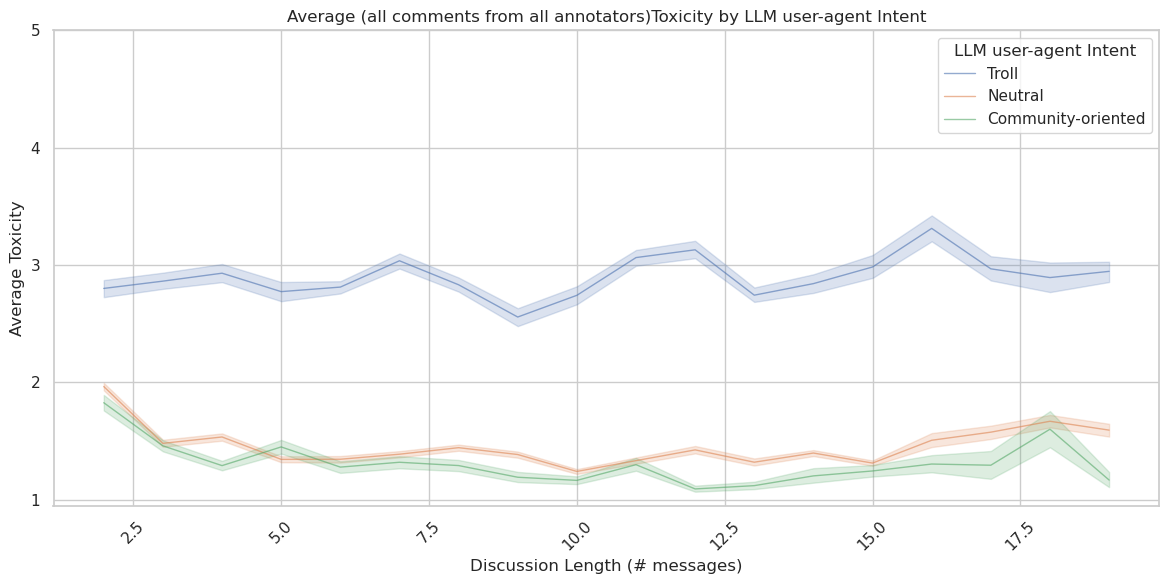

In [7]:
tasks.graphs.plot_timeseries(
    no_mod_df,
    y_col="Toxicity",
    hue_col="intent",
    hue_col_label="LLM user-agent Intent",
)
plt.yticks(TOXICITY_TICKS)
plt.show()

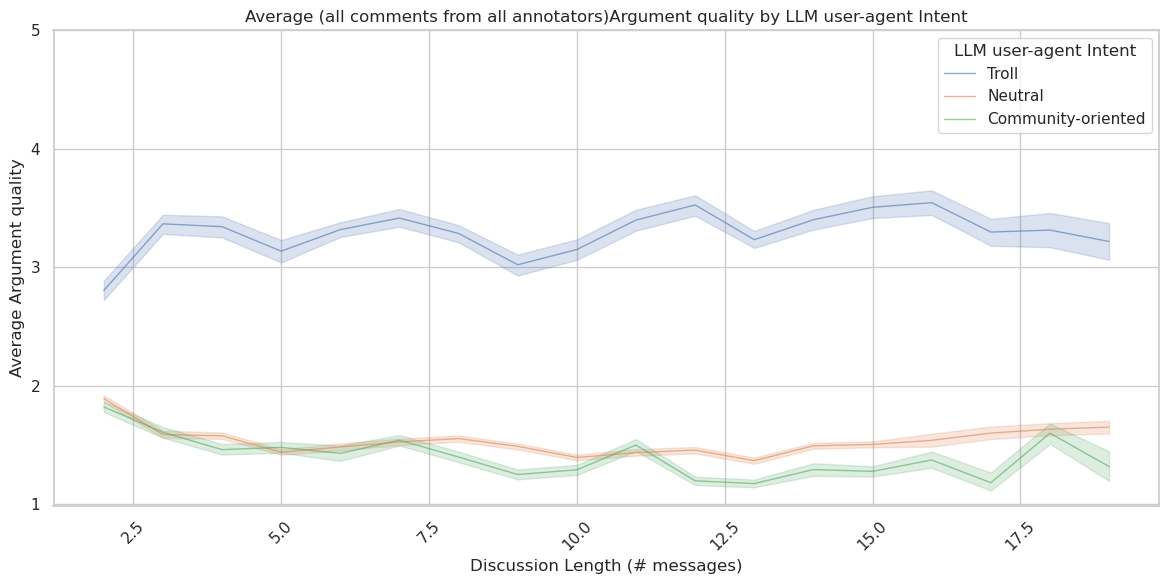

In [8]:
tasks.graphs.plot_timeseries(
    no_mod_df,
    y_col="Argument Quality",
    hue_col="intent",
    hue_col_label="LLM user-agent Intent",
)
plt.yticks(TOXICITY_TICKS)
plt.show()

### Moderation Strategy

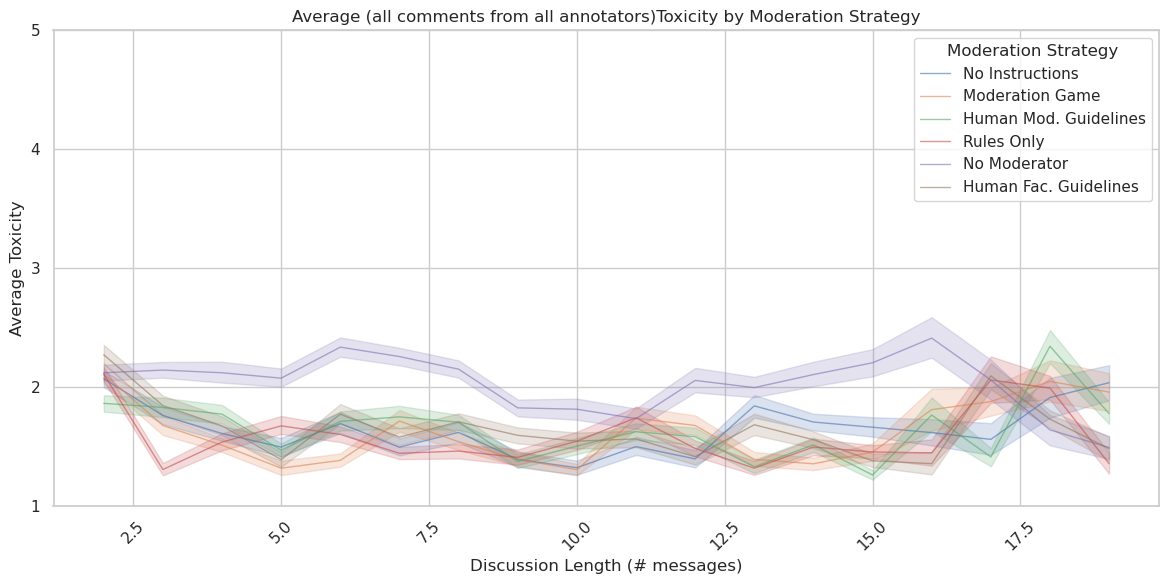

In [9]:
tasks.graphs.plot_timeseries(
    no_mod_df,
    y_col="Toxicity",
    hue_col="conv_variant",
    hue_col_label="Moderation Strategy",
)
plt.yticks(TOXICITY_TICKS)
plt.show()

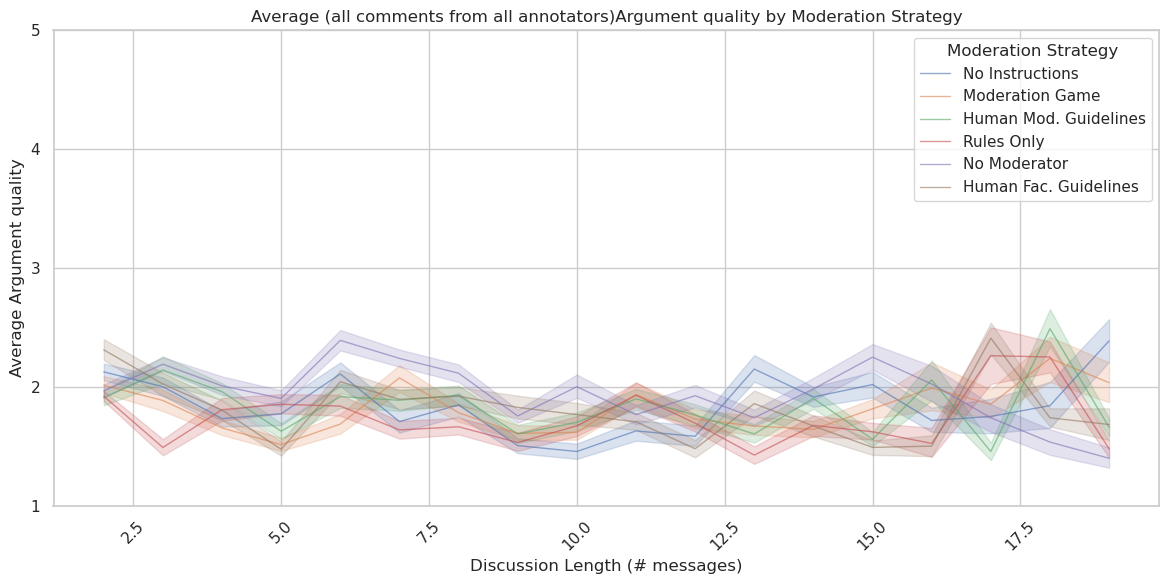

In [10]:
tasks.graphs.plot_timeseries(
    no_mod_df,
    y_col="Argument Quality",
    hue_col="conv_variant",
    hue_col_label="Moderation Strategy",
)
plt.yticks(TOXICITY_TICKS)
plt.show()

### Models

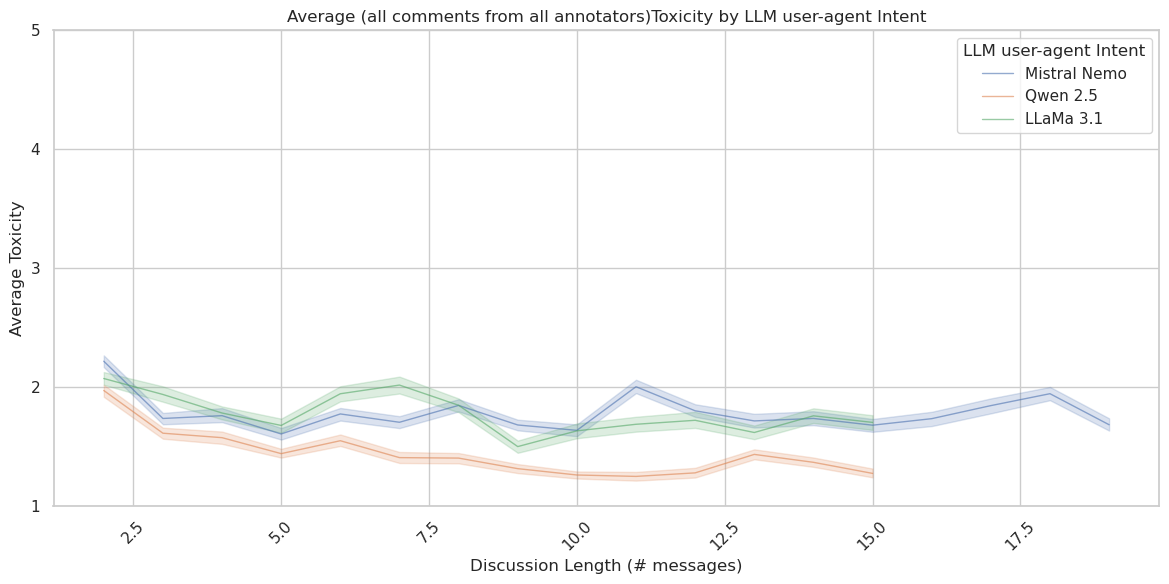

In [11]:
tasks.graphs.plot_timeseries(
    no_mod_df,
    y_col="Toxicity",
    hue_col="model",
    hue_col_label="LLM user-agent Intent",
)
plt.yticks(TOXICITY_TICKS)
plt.show()

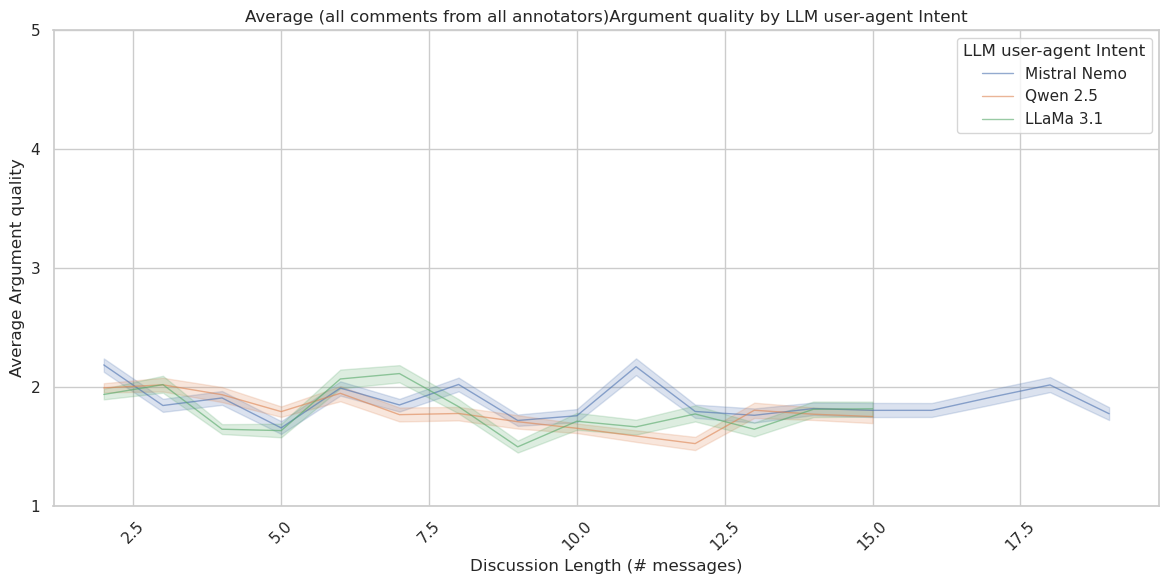

In [12]:
tasks.graphs.plot_timeseries(
    no_mod_df,
    y_col="Argument Quality",
    hue_col="model",
    hue_col_label="LLM user-agent Intent",
)
plt.yticks(TOXICITY_TICKS)
plt.show()

## Statistics

In [13]:
scipy.stats.spearmanr(no_mod_df['message_order'], no_mod_df['Toxicity'])

SignificanceResult(statistic=-0.0862566317202914, pvalue=1.1730434910765594e-78)

In [14]:
model = smf.ols(
    "Toxicity ~ C(conv_variant, Treatment(reference='No Moderator'))*message_order",
    data=no_mod_df
)

# Fit the model
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Toxicity   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     182.7
Date:                Mon, 28 Apr 2025   Prob (F-statistic):               0.00
Time:                        11:32:26   Log-Likelihood:                -61187.
No. Observations:               47212   AIC:                         1.224e+05
Df Residuals:                   47200   BIC:                         1.225e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================================
                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                       2.1913      0.022     99.333      0.000       2.148       2.235
C(conv_variant, Treatment(reference='No Moderator'))[T.Human Fac. Guidelines]                  -0.3371      0.031    -10.793      0.000      -0.398      -0.276
C(conv_variant, Treatment(reference='No Moderator'))[T.Human Mod. Guidelines]                  -0.4336      0.031    -13.900      0.000      -0.495      -0.372
C(conv_variant, Treatment(reference='No Moderator'))[T.Moderation Game]                        -0.6050      0.032    -19.025      0.000      -0.667      -0.543
C(conv_variant, Treatment(reference='No Moderator'))[T.No Instructions]                        -0.5322      0.031    -16.932      0.000      -0.594      -0.471
C(conv_variant, Treatment(reference='No Moderator'))[T.Rules Only]                             -0.5658      0.031    -18.136      0.000      -0.627      -0.505
message_order                                                                                  -0.0154      0.002     -7.206      0.000      -0.020      -0.011
C(conv_variant, Treatment(reference='No Moderator'))[T.Human Fac. Guidelines]:message_order    -0.0076      0.003     -2.516      0.012      -0.014      -0.002
C(conv_variant, Treatment(reference='No Moderator'))[T.Human Mod. Guidelines]:message_order    -0.0006      0.003     -0.199      0.843      -0.007       0.005
C(conv_variant, Treatment(reference='No Moderator'))[T.Moderation Game]:message_order           0.0140      0.003      4.566      0.000       0.008       0.020
C(conv_variant, Treatment(reference='No Moderator'))[T.No Instructions]:message_order           0.0119      0.003      3.916      0.000       0.006       0.018
C(conv_variant, Treatment(reference='No Moderator'))[T.Rules Only]:message_order                0.0076      0.003      2.513      0.012       0.002       0.013
==============================================================================
Omnibus:                     7471.893   Durbin-Watson:                   0.263
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11519.125
Skew:                           1.167   Prob(JB):                         0.00
Kurtosis:                       3.636   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model = smf.ols(
    "arg_quality ~ C(conv_variant, Treatment(reference='No Moderator'))*message_order",
    data=no_mod_df.rename({"Argument Quality": "arg_quality"}, axis=1),
)

# Fit the model
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            arg_quality   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     49.96
Date:                Mon, 28 Apr 2025   Prob (F-statistic):          3.88e-110
Time:                        11:32:26   Log-Likelihood:                -65730.
No. Observations:               47212   AIC:                         1.315e+05
Df Residuals:                   47200   BIC:                         1.316e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================================
                                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                       2.1753      0.024     89.559      0.000       2.128       2.223
C(conv_variant, Treatment(reference='No Moderator'))[T.Human Fac. Guidelines]                  -0.1499      0.034     -4.358      0.000      -0.217      -0.082
C(conv_variant, Treatment(reference='No Moderator'))[T.Human Mod. Guidelines]                  -0.2380      0.034     -6.929      0.000      -0.305      -0.171
C(conv_variant, Treatment(reference='No Moderator'))[T.Moderation Game]                        -0.4292      0.035    -12.258      0.000      -0.498      -0.361
C(conv_variant, Treatment(reference='No Moderator'))[T.No Instructions]                        -0.3278      0.035     -9.472      0.000      -0.396      -0.260
C(conv_variant, Treatment(reference='No Moderator'))[T.Rules Only]                             -0.4345      0.034    -12.650      0.000      -0.502      -0.367
message_order                                                                                  -0.0205      0.002     -8.747      0.000      -0.025      -0.016
C(conv_variant, Treatment(reference='No Moderator'))[T.Human Fac. Guidelines]:message_order    -0.0029      0.003     -0.856      0.392      -0.009       0.004
C(conv_variant, Treatment(reference='No Moderator'))[T.Human Mod. Guidelines]:message_order     0.0081      0.003      2.456      0.014       0.002       0.015
C(conv_variant, Treatment(reference='No Moderator'))[T.Moderation Game]:message_order           0.0245      0.003      7.282      0.000       0.018       0.031
C(conv_variant, Treatment(reference='No Moderator'))[T.No Instructions]:message_order           0.0191      0.003      5.713      0.000       0.013       0.026
C(conv_variant, Treatment(reference='No Moderator'))[T.Rules Only]:message_order                0.0174      0.003      5.255      0.000       0.011       0.024
==============================================================================
Omnibus:                     9372.371   Durbin-Watson:                   0.255
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16364.642
Skew:                           1.302   Prob(JB):                         0.00
Kurtosis:                       4.239   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Annotator analysis

Figure saved to /home/dimits/Documents/research/synthetic_moderation_experiments/graphs/annotator_variance.png


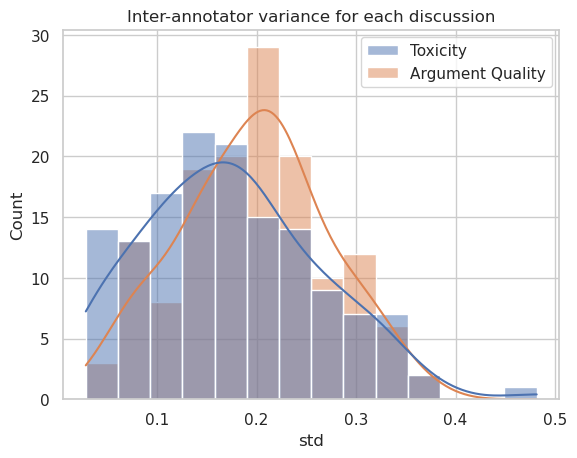

In [17]:
toxicity_var = tasks.stats.discussion_var(
    no_mod_df, "conv_id", "message_id", "Toxicity"
)
argumentq_var = tasks.stats.discussion_var(
    no_mod_df, "conv_id", "message_id", "Argument Quality"
)

sns.histplot([toxicity_var, argumentq_var], kde=True)
plt.title("Inter-annotator variance for each discussion")
plt.xlabel("std")

tasks.graphs.save_plot(path=GRAPH_OUTPUT_DIR / "annotator_variance.png")
plt.show()